In [1]:
] instantiate

In [2]:
using Arrow
using DataFrames
using FreqTables
using Plots
using Random
using ROCAnalysis
using Serialization
using XGBoost

In [3]:
adult_train = deserialize("adult_train.bin")

32561×66 Matrix{Int64}:
 39  0  0  0  0  0  0  1  0  0  0  0  0  …  0  0  0  1  0   2174  0  40  1  0
 50  0  0  0  0  0  1  0  0  0  0  0  0     0  0  0  1  0      0  0  13  1  0
 38  0  0  0  1  0  0  0  0  0  0  0  0     0  0  0  1  0      0  0  40  1  0
 53  0  0  0  1  0  0  0  0  0  0  1  0     0  1  0  0  0      0  0  40  1  0
 28  0  0  0  1  0  0  0  0  0  0  0  0     0  1  0  0  1      0  0  40  0  0
 37  0  0  0  1  0  0  0  0  0  0  0  0  …  0  0  0  1  1      0  0  40  1  0
 49  0  0  0  1  0  0  0  0  0  0  0  0     0  1  0  0  1      0  0  16  0  0
 52  0  0  0  0  0  1  0  0  0  0  0  0     0  0  0  1  0      0  0  45  1  1
 31  0  0  0  1  0  0  0  0  0  0  0  0     0  0  0  1  1  14084  0  50  1  1
 42  0  0  0  1  0  0  0  0  0  0  0  0     0  0  0  1  0   5178  0  40  1  1
 37  0  0  0  1  0  0  0  0  0  0  0  0  …  0  1  0  0  0      0  0  80  1  1
 30  0  0  0  0  0  0  1  0  0  0  0  0     1  0  0  0  0      0  0  40  0  1
 23  0  0  0  1  0  0  0  0  0  0  0  0 

In [4]:
adult_test = deserialize("adult_test.bin")

16281×66 Matrix{Int64}:
 25  0  0  0  1  0  0  0  0  0  0  1  …  0  0  1  0  0  0     0  0  40  1  0
 38  0  0  0  1  0  0  0  0  0  0  0     0  0  0  0  1  0     0  0  50  1  0
 28  0  1  0  0  0  0  0  0  0  0  0     0  0  0  0  1  0     0  0  40  1  1
 44  0  0  0  1  0  0  0  0  0  0  0     0  0  1  0  0  0  7688  0  40  1  1
 18  0  0  0  0  0  0  0  0  1  0  0     0  0  0  0  1  1     0  0  30  1  0
 34  0  0  0  1  0  0  0  0  0  1  0  …  0  0  0  0  1  0     0  0  30  1  0
 29  0  0  0  0  0  0  0  0  1  0  0     0  0  1  0  0  0     0  0  40  1  0
 63  0  0  0  0  0  1  0  0  0  0  0     0  0  0  0  1  0  3103  0  32  1  1
 24  0  0  0  1  0  0  0  0  0  0  0     0  0  0  0  1  1     0  0  40  1  0
 55  0  0  0  1  0  0  0  0  0  0  0     0  0  0  0  1  0     0  0  10  1  0
 65  0  0  0  1  0  0  0  0  0  0  0  …  0  0  0  0  1  0  6418  0  40  1  1
 36  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  1  0     0  0  40  1  0
 26  0  0  0  1  0  0  0  0  0  0  0     0  0  0  0 

In [5]:
feature_names = deserialize("feature_names.bin")

66-element Vector{String}:
 "age"
 "workclass_Federal-gov"
 "workclass_Local-gov"
 "workclass_Never-worked"
 "workclass_Private"
 "workclass_Self-emp-inc"
 "workclass_Self-emp-not-inc"
 "workclass_State-gov"
 "workclass_Without-pay"
 "workclass_missing"
 "education_10th"
 "education_11th"
 "education_12th"
 ⋮
 "relationship_Wife"
 "race_Amer-Indian-Eskimo"
 "race_Asian-Pac-Islander"
 "race_Black"
 "race_Other"
 "race_White"
 "sex_Female"
 "capital_gain"
 "capital_loss"
 "hours_per_week"
 "native_country_United-States"
 "target"

In [6]:
X_train = adult_train[:, 1:end-1]
y_train = adult_train[:, end]
X_test = adult_test[:, 1:end-1]
y_test = adult_test[:, end] ;

In [7]:
nfold_cv(X_train, 50, 25, label=y_train, seed=314159265, metrics=["auc"], params=["objective" => "binary:logistic"])

[1]	cv-test-auc:0.896704+0.009075	cv-train-auc:0.899943+0.001531
[2]	cv-test-auc:0.905427+0.009333	cv-train-auc:0.908832+0.000662
[3]	cv-test-auc:0.909074+0.008900	cv-train-auc:0.913436+0.000612
[4]	cv-test-auc:0.911425+0.009009	cv-train-auc:0.916362+0.000596
[5]	cv-test-auc:0.913941+0.009125	cv-train-auc:0.918803+0.000557
[6]	cv-test-auc:0.915479+0.008844	cv-train-auc:0.920979+0.000533
[7]	cv-test-auc:0.917092+0.008547	cv-train-auc:0.922995+0.000546
[8]	cv-test-auc:0.918143+0.008401	cv-train-auc:0.924728+0.000574
[9]	cv-test-auc:0.919243+0.008224	cv-train-auc:0.926531+0.000616
[10]	cv-test-auc:0.920254+0.008029	cv-train-auc:0.928176+0.000580
[11]	cv-test-auc:0.920816+0.007868	cv-train-auc:0.929382+0.000577
[12]	cv-test-auc:0.921302+0.007810	cv-train-auc:0.930557+0.000609
[13]	cv-test-auc:0.921783+0.007787	cv-train-auc:0.931637+0.000548
[14]	cv-test-auc:0.922151+0.008022	cv-train-auc:0.932575+0.000544
[15]	cv-test-auc:0.922554+0.008044	cv-train-auc:0.933455+0.000494
[16]	cv-test-auc:0.

In [8]:
iters=32

32

In [9]:
model = xgboost(X_train, iters, label=y_train, metrics=["auc"], seed=314159265, objective = "binary:logistic")

[1]	train-auc:0.897778
[2]	train-auc:0.905337
[3]	train-auc:0.911120
[4]	train-auc:0.913656
[5]	train-auc:0.915217
[6]	train-auc:0.917159
[7]	train-auc:0.919597
[8]	train-auc:0.921830
[9]	train-auc:0.923705
[10]	train-auc:0.925386
[11]	train-auc:0.926403
[12]	train-auc:0.927786
[13]	train-auc:0.928558
[14]	train-auc:0.929251
[15]	train-auc:0.930076
[16]	train-auc:0.931540
[17]	train-auc:0.932565
[18]	train-auc:0.932973
[19]	train-auc:0.933483
[20]	train-auc:0.933982
[21]	train-auc:0.934874
[22]	train-auc:0.935516
[23]	train-auc:0.936109
[24]	train-auc:0.936408
[25]	train-auc:0.937252
[26]	train-auc:0.937590
[27]	train-auc:0.938104
[28]	train-auc:0.938207
[29]	train-auc:0.938642
[30]	train-auc:0.938998
[31]	train-auc:0.939816
[32]	train-auc:0.940255


Booster(Ptr{Nothing} @0x000000007f198120)

In [10]:
predicted_train = predict(model, X_train)
predicted_test = predict(model, X_test)
predicted_train0 = predicted_train[y_train .== 0]
predicted_train1 = predicted_train[y_train .== 1]
predicted_test0 = predicted_test[y_test .== 0]
predicted_test1 = predicted_test[y_test .== 1] ;

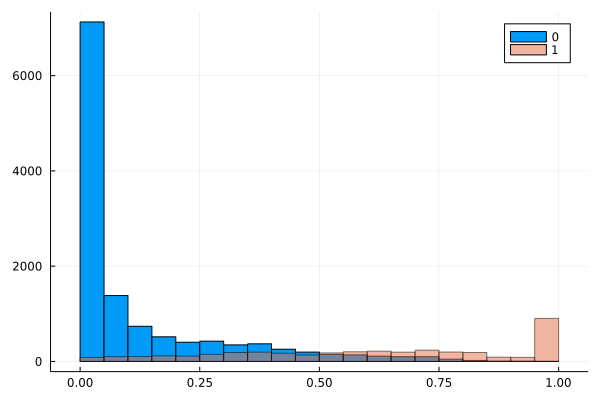

In [11]:
histogram(predicted_test0, bins=20, label="0")
histogram!(predicted_test1, bins=20, label="1", seriesalpha=0.5)

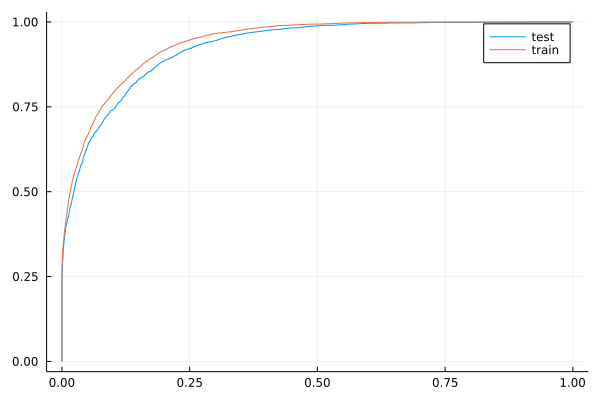

In [12]:
roc_train = roc(predicted_train1, predicted_train0)
roc_test = roc(predicted_test1, predicted_test0)
plot(roc_test.pfa, 1 .- roc_test.pmiss, label="test")
plot!(roc_train.pfa, 1 .- roc_train.pmiss, label="train")

In [13]:
1 .- [auc(roc_train), auc(roc_test)]

2-element Vector{Float64}:
 0.9402553491336098
 0.9269902714082026

In [14]:
conf_mat_train = freqtable(predicted_train .>= 0.5, y_train)

2×2 Named Matrix{Int64}
Dim1 ╲ Dim2 │     0      1
────────────┼─────────────
false       │ 23477   2618
true        │  1243   5223

In [15]:
conf_mat_test = freqtable(predicted_test .>= 0.5, y_test)

2×2 Named Matrix{Int64}
Dim1 ╲ Dim2 │     0      1
────────────┼─────────────
false       │ 11759   1352
true        │   676   2494

In [16]:
# Taken from solution
function quality_report(mat::AbstractMatrix)
    acc = (mat[1,1] + mat[2,2]) / sum(mat)
    prec = mat[2,2] / sum(mat[2,:])
    rec = mat[2,2] / sum(mat[:,2])
    f1 = 2 * prec * rec / (prec + rec)
    println("----Classification quality report----")
    println("Accuracy: ", round(acc*100,digits=2), "%")
    println("Precision: ", round(prec*100,digits=2), "%")
    println("Recall: ", round(rec*100,digits=2), "%")
    println("F1-score: ", round(f1*100,digits=2), "%")
end

quality_report (generic function with 1 method)

In [17]:
quality_report(conf_mat_train)

----Classification quality report----
Accuracy: 88.14%
Precision: 80.78%
Recall: 66.61%
F1-score: 73.01%


In [18]:
quality_report(conf_mat_test)

----Classification quality report----
Accuracy: 87.54%
Precision: 78.68%
Recall: 64.85%
F1-score: 71.09%


In [19]:
mod_importance = importance(model, feature_names)

53-element Vector{XGBoost.FeatureImportance}:
Gain      Coverage  Frequency  Feature
0.3590    0.0795    0.0210     marital_status_Married-civ-spouse
0.1936    0.1764    0.1284     capital_gain
0.1660    0.0966    0.0755     education_num
0.0793    0.1310    0.1938     age
0.0630    0.1105    0.0889     capital_loss
0.0394    0.0856    0.1309     hours_per_week
0.0146    0.0222    0.0210     occupation_Exec-managerial
0.0095    0.0150    0.0193     occupation_Prof-specialty
0.0069    0.0144    0.0243     sex_Female
0.0059    0.0181    0.0076     occupation_Other-service
0.0057    0.0113    0.0185     workclass_Self-emp-not-inc
0.0054    0.0141    0.0201     relationship_Wife
0.0047    0.0209    0.0117     occupation_Farming-fishing
0.0044    0.0123    0.0034     relationship_Own-child
0.0036    0.0050    0.0193     relationship_Not-in-family
0.0033    0.0116    0.0050     occupation_Tech-support
0.0030    0.0070    0.0067     occupation_Sales
0.0027    0.0140    0.0059     workclass_Fe

In [20]:
# from milestone 1
function df2data(df::AbstractDataFrame) 
    x_vecs = AbstractVector[]
    feature_names = String[]
    for i in 1:ncol(df)-1
        col = df[!, i]
        if eltype(col) <: Real
            push!(x_vecs, col)
            append!(feature_names, names(df, i))
        else
            uniq_col = sort(unique(col)) # Sorting is important to keep the columns order consistent between train and test sets
            if length(uniq_col) == 2
                pop!(uniq_col) # for binary feature just keep one level
            end
            for u in uniq_col
                push!(x_vecs, isequal.(col, u))
            end
            append!(feature_names, string.(names(df, i), "_", uniq_col))
        end
    end
    y = Int.(df.target .== ">50K")
    push!(x_vecs, y)
    push!(feature_names, "target")
    return reduce(hcat, x_vecs), feature_names
end

df2data (generic function with 1 method)

In [21]:
# from solution
function varimp(df, ref_roc, bst, name, feature_names, reps)
    df_shuffle = copy(df)
    delta = 0.0
    for _ in 1:reps
        shuffle!(df_shuffle[!, name])
        X, feature_names = df2data(df_shuffle)
        y = X[:,end]
        X = X[:,1:end-1]
        pred = predict(bst, X)
        pred_1 = pred[y .== 1]
        pred_0 = pred[y .== 0]
        delta += auc(roc(pred_1, pred_0)) - auc(ref_roc)
    end
    return delta / reps
end

varimp (generic function with 1 method)

In [22]:
df = DataFrame(Arrow.Table("adult_test.arrow"))

16281×14 DataFrame
   Row │ age    workclass         education     education_num  marital_status  ⋯
       │ Int64  String?           String        Int64          String          ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │    25  Private           11th                      7  Never-married   ⋯
     2 │    38  Private           HS-grad                   9  Married-civ-spo
     3 │    28  Local-gov         Assoc-acdm               12  Married-civ-spo
     4 │    44  Private           Some-college             10  Married-civ-spo
     5 │    18  missing           Some-college             10  Never-married   ⋯
     6 │    34  Private           10th                      6  Never-married
     7 │    29  missing           HS-grad                   9  Never-married
     8 │    63  Self-emp-not-inc  Prof-school              15  Married-civ-spo
     9 │    24  Private           Some-college             10  Never-married   ⋯
    10 │    55  Private           7th-8th                   4  Married-civ-spo
    11 │    65  Private           HS-grad                   9  Married-civ-spo
   ⋮   │   ⋮           ⋮               ⋮              ⋮                ⋮       ⋱
 16272 │    61  Private           HS-grad                   9  Married-civ-spo
 16273 │    31  Private           HS-grad                   9  Married-civ-spo ⋯
 16274 │    25  Private           HS-grad                   9  Never-married
 16275 │    48  Local-gov         Masters                  14  Divorced
 16276 │    33  Private           Bachelors                13  Never-married
 16277 │    39  Private           Bachelors                13  Divorced        ⋯
 16278 │    64  missing           HS-grad                   9  Widowed
 16279 │    38  Private           Bachelors                13  Married-civ-spo
 16280 │    44  Private           Bachelors                13  Divorced
 16281 │    35  Self-emp-inc      Bachelors                13  Married-civ-spo ⋯
                                               10 columns and 16260 rows omitted

In [23]:
varimp_t  = DataFrame(variable=String[], varimp=Float64[])
for name ∈ names(select(df, Not(:target)))
    res = varimp(df, roc_test, model, name, feature_names, 10)
    push!(varimp_t, (name, res))
end
sort!(varimp_t, :varimp)
varimp_t

13×2 DataFrame
 Row │ variable        varimp      
     │ String          Float64     
─────┼─────────────────────────────
   1 │ native_country  0.000157368
   2 │ education       0.000170549
   3 │ race            0.000620858
   4 │ sex             0.00166066
   5 │ workclass       0.00252706
   6 │ relationship    0.00464474
   7 │ hours_per_week  0.0122323
   8 │ capital_loss    0.01316
   9 │ occupation      0.0135982
  10 │ education_num   0.0271277
  11 │ age             0.0371312
  12 │ capital_gain    0.0512299
  13 │ marital_status  0.0883414

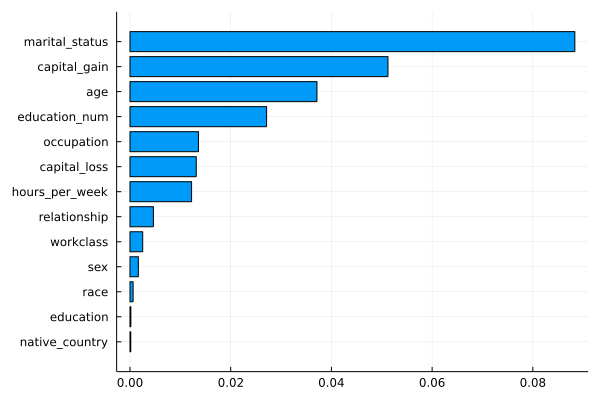

In [24]:
bar(varimp_t.variable, varimp_t.varimp, orientation=:horizontal, legend=nothing)

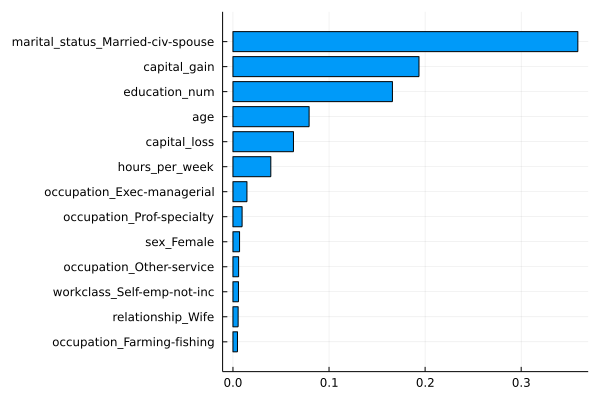

In [25]:
varimp_model = DataFrame(variable=getproperty.(mod_importance, :fname), varimp=getproperty.(mod_importance, :gain))
sort!(varimp_model, :varimp)
varimp_model = varimp_model[end-12:end, :]
bar(varimp_model.variable, varimp_model.varimp, orientation=:horizontal, legend=nothing)

In [26]:
open("xgboost_adult.model", "w") do io
    serialize(io, model)
end